In [56]:
# Import Dependencies

import pandas as pd
import matplotlib.pyplot as plt
import tweepy
import time
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [57]:
#API Keys

consumer_key = 'jyXE0KNTuBrPzLVO5U0nmAwqq'
consumer_secret = 'IsjSU578iK9QVNlrEy13S0jH6wmRbk0Xpwk0subbMx9RvpDxAO'
access_token = '40121478-TKBjY3feEKwLv9hDIm8cWlJdRO3WNXJGGWm6hK1dW'
access_token_secret = '5jjxsSFpq6utTYBUxX729oTk6jvaOyuf6XfQQlKeANxcT'

#Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [58]:
#Sources of News
news_org = ["@BBCWorld", "@CBSNews", "@cnnbrk", "@FoxNews", "@nytimes"]

tweets = []

for value in news_org:
    for status in tweepy.Cursor(api.user_timeline, id=value).items(100):
        tweets.append(status)


In [59]:
# Allign tweets in df and add column names and labels

df = pd.DataFrame([x._json for x in tweets])[['text', 'created_at', 'user']]
df['label'] = df.user.map(lambda x: x.get('name'))
df.head()

,text,created_at,user,label
0,Music festivals: Which is the biggest in the w...,Wed Jul 04 00:22:58 +0000 2018,"{'id': 742143, 'id_str': '742143', 'name': 'BB...",BBC News (World)
1,Thailand cave rescue: What will the impact be ...,Tue Jul 03 23:39:51 +0000 2018,"{'id': 742143, 'id_str': '742143', 'name': 'BB...",BBC News (World)
2,Affirmative action: Trump 'to scrap' college r...,Tue Jul 03 21:32:42 +0000 2018,"{'id': 742143, 'id_str': '742143', 'name': 'BB...",BBC News (World)
3,RT @BBCSport: FT (et): #COL 1-1 #ENG \n\nIt's ...,Tue Jul 03 20:40:11 +0000 2018,"{'id': 742143, 'id_str': '742143', 'name': 'BB...",BBC News (World)
4,RT @bbctennis: Maria Sharapova is OUT in the f...,Tue Jul 03 20:15:19 +0000 2018,"{'id': 742143, 'id_str': '742143', 'name': 'BB...",BBC News (World)


In [60]:
# Verifying correct tweets from each source

df.label.value_counts()

BBC News (World)      100
Fox News              100
CNN Breaking News     100
CBS News              100
The New York Times    100
Name: label, dtype: int64

In [61]:
#Assigning a score to each tweet

df['compound'] = df['text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
df['pos'] = df['text'].apply(lambda x: analyzer.polarity_scores(x)['pos'])
df['neu'] = df['text'].apply(lambda x: analyzer.polarity_scores(x)['neu'])
df['neg'] = df['text'].apply(lambda x: analyzer.polarity_scores(x)['neg'])

df.head()

,text,created_at,user,label,compound,pos,neu,neg
0,Music festivals: Which is the biggest in the w...,Wed Jul 04 00:22:58 +0000 2018,"{'id': 742143, 'id_str': '742143', 'name': 'BB...",BBC News (World),0.3612,0.217,0.783,0.000
1,Thailand cave rescue: What will the impact be ...,Tue Jul 03 23:39:51 +0000 2018,"{'id': 742143, 'id_str': '742143', 'name': 'BB...",BBC News (World),0.5106,0.202,0.798,0.000
2,Affirmative action: Trump 'to scrap' college r...,Tue Jul 03 21:32:42 +0000 2018,"{'id': 742143, 'id_str': '742143', 'name': 'BB...",BBC News (World),-0.1027,0.000,0.865,0.135
3,RT @BBCSport: FT (et): #COL 1-1 #ENG \n\nIt's ...,Tue Jul 03 20:40:11 +0000 2018,"{'id': 742143, 'id_str': '742143', 'name': 'BB...",BBC News (World),0.0000,0.000,1.000,0.000
4,RT @bbctennis: Maria Sharapova is OUT in the f...,Tue Jul 03 20:15:19 +0000 2018,"{'id': 742143, 'id_str': '742143', 'name': 'BB...",BBC News (World),0.5719,0.163,0.837,0.000


In [62]:
df.drop('user', axis=1, inplace=True)

In [63]:
# Reformatting date/time column

df['created_at'] = pd.to_datetime(df['created_at'])
df.head()

,text,created_at,label,compound,pos,neu,neg
0,Music festivals: Which is the biggest in the w...,2018-07-04 00:22:58,BBC News (World),0.3612,0.217,0.783,0.000
1,Thailand cave rescue: What will the impact be ...,2018-07-03 23:39:51,BBC News (World),0.5106,0.202,0.798,0.000
2,Affirmative action: Trump 'to scrap' college r...,2018-07-03 21:32:42,BBC News (World),-0.1027,0.000,0.865,0.135
3,RT @BBCSport: FT (et): #COL 1-1 #ENG \n\nIt's ...,2018-07-03 20:40:11,BBC News (World),0.0000,0.000,1.000,0.000
4,RT @bbctennis: Maria Sharapova is OUT in the f...,2018-07-03 20:15:19,BBC News (World),0.5719,0.163,0.837,0.000


In [64]:
df['tweets_ago'] = df.groupby('label').cumcount() + 1

In [65]:
bbc = df.loc[df["label"] == "BBC"]
cnn = df.loc[df["label"] == "CNN"]
nyt = df.loc[df["label"] == "The New York Times"]
cbs = df.loc[df["label"] == "CBS News"]
fox = df.loc[df["label"] == "Fox News"]

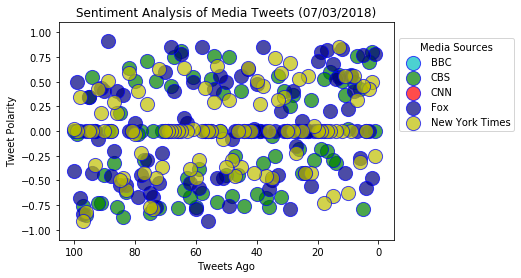

In [66]:
# Create and Label Scatter Plot of Sentiment

plt.scatter(bbc['tweets_ago'], bbc['compound'], c='c',edgecolor='b', s=200, alpha=0.70, label='BBC')
plt.scatter(cbs['tweets_ago'], cbs['compound'], c='g',edgecolor='b', s=200, alpha=0.70, label='CBS')
plt.scatter(cnn['tweets_ago'], cnn['compound'], c='r',edgecolor='b', s=200, alpha=0.70, label='CNN')
plt.scatter(fox['tweets_ago'], fox['compound'], c='navy',edgecolor='b', s=200, alpha=0.70, label='Fox')
plt.scatter(nyt['tweets_ago'], nyt['compound'], c='y',edgecolor='b', s=200, alpha=0.70, label='New York Times')

plt.title("Sentiment Analysis of Media Tweets (%s)" % (time.strftime("%m/%d/%Y")))
plt.xlabel("Tweets Ago")
plt.xlim(105,-5)
plt.ylabel("Tweet Polarity")
plt.ylim(-1.1,1.1)
plt.legend(bbox_to_anchor=(1, 0.95), title='Media Sources', fontsize='medium')

plt.show()

In [69]:
plt.bar(0, bbc['compound'].mean(), color='c', edgecolor='b', width=1)
plt.bar(1, cbs['compound'].mean(), color='g', edgecolor='b', width=1)
plt.bar(2, cnn['compound'].mean(), color='r', edgecolor='b', width=1)
plt.bar(3, fox['compound'].mean(), color='navy', edgecolor='b', width=1)
plt.bar(4, nyt['compound'].mean(), color='y', edgecolor='b', width=1)

plt.title("Overall Media Sentiment based on Twitter (%s)" % (time.strftime("%m/%d/%Y")),
                                                                           fontdict = {'fontsize': 12, 'fontweight': 'bold'})
plt.ylim(-0.2, 0.2)
plt.ylabel("Tweet Polarity")
plt.axhline(y=0, color = 'black') #adds a horizontal line at zero
x_labels = ["BBC", "CBS", "CNN", "Fox", "NYT"]
x_locations = [value for value in np.arange(5)]
plt.xticks(x_locations, x_labels)

for a,b in zip(np.arange(5), [bbc['compound'].mean(),cbs['compound'].mean(), 
                              cnn['compound'].mean(),
                             fox['compound'].mean(),nyt['compound'].mean()]):
    if b > 0:
        plt.text(a-0.2,b-b-0.015,str(round(b,2)))
    else:
        plt.text(a-0.2,b-b+0.01,str(round(b,2)))             
        
plt.show()

/Users/jefflaskey/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/Users/jefflaskey/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


ValueError: cannot convert float NaN to integer